In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


# Assuming the data is stored in a CSV file named 'fertilizer_data.csv'
data = pd.read_csv('C:/Users/Dex/Documents/TerraGuard/TerraGuardDataset/TerraGuardData.csv')

pd.set_option('display.max_rows', None)

# Separate input features (X) and the output label (y) for each nutrient
X = data[['Crop', 'Hectare', 'N', 'P', 'K']]
y_duofos = data['Duofos(0-20-0)']
y_urea = data['Urea(46-0-0)']
y_muriate = data['Muriate of Potash(0-0-60)']
# Convert categorical 'Crop' values to numerical using LabelEncoder
crop_encoder = LabelEncoder()
X['Crop'] = crop_encoder.fit_transform(X['Crop'])

# Split the data into training and testing sets 
X_train, X_test, y_duofos_train, y_duofos_test, y_urea_train, y_urea_test, y_muriate_train, y_muriate_test =train_test_split(
    X, y_duofos, y_urea, y_muriate, test_size=0.1, random_state=420
)


# Create and train the DecisionTreeClassifier for each nutrient
classifier_duofos = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier_urea = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier_muriate = DecisionTreeClassifier(criterion='entropy', random_state=42)

classifier_duofos.fit(X_train, y_duofos_train)
classifier_urea.fit(X_train, y_urea_train)
classifier_muriate.fit(X_train, y_muriate_train)

# Make predictions on the testing set for each nutrient
y_duofos_pred = classifier_duofos.predict(X_test)
y_urea_pred = classifier_urea.predict(X_test)
y_muriate_pred = classifier_muriate.predict(X_test)

# Convert the predicted values back to the original format
predicted_fertilizer = pd.DataFrame({
    'Duofos(0-20-0)': y_duofos_pred,
    'Urea(46-0-0)': y_urea_pred,
    'Muriate of Potash(0-0-60)': y_muriate_pred
})

# Compare predicted ranges with actual ranges for the testing set
print("\nPredicted Fertilizer Ranges for Testing Set:")
print(predicted_fertilizer)



Predicted Fertilizer Ranges for Testing Set:
   Duofos(0-20-0) Urea(46-0-0) Muriate of Potash(0-0-60)
0         212-424      325-650                   150-300
1         212-424      280-560                   150-300
2         425-850      415-830                   275-550
3             0-0      304-609                       0-0
4             0-0      190-380                   100-200
5         425-850      380-760                   220-440
6         212-424      304-609                   150-300
7             0-0      304-609                   150-300
8         212-424      325-650                   160-320
9         425-850      400-800                   275-550
10            0-0      266-532                   120-240
11        212-424      280-560                   150-300
12          20-40       90-180                     30-60
13        425-850      305-609                   150-300
14            0-0      250-500                   125-250
15          15-30       60-120            

C:\Users\Dex\AppData\Local\Temp\ipykernel_9836\1183785513.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Crop'] = crop_encoder.fit_transform(X['Crop'])


In [2]:
# MANUAL INPUT
# Function to convert numerical value to original range format
def convert_to_range(value):
    lower_bound = int(value)
    upper_bound = lower_bound + 1
    return f"{lower_bound}-{upper_bound}"
# Function for manual input of data
def manual_input():
    input_data = {}
    input_data['Crop'] = ["Banana"]
    input_data['Hectare'] = [2]
    input_data['N'] = [1.56]
    input_data['P'] = [0.59]
    input_data['K'] = [155.64]
    return pd.DataFrame(input_data)

# Manual input of data
input_df = manual_input()
# Convert categorical 'Crop' value to numerical using the fitted LabelEncoder
input_df['Crop'] = crop_encoder.transform(input_df['Crop'])

# Make predictions for the input data
y_duofos_pred = classifier_duofos.predict(input_df)
y_urea_pred = classifier_urea.predict(input_df)
y_muriate_pred = classifier_muriate.predict(input_df)



# Convert the predicted values back to the original format
predicted_fertilizer = pd.DataFrame({
    'Crop': input_df['Crop'],
    'Hectare': input_df['Hectare'],
    'N': input_df['N'],
    'P': input_df['P'],
    'K': input_df['K'],
    'Duofos(0-20-0)': y_duofos_pred,
    'Urea(46-0-0)': y_urea_pred,
    'Muriate of Potash(0-0-60)': y_muriate_pred
})


predicted_fertilizer


,Crop,Hectare,N,P,K,Duofos(0-20-0),Urea(46-0-0),Muriate of Potash(0-0-60)
0,0,2,1.56,0.59,155.64,425-850,304-609,208-416


In [34]:
#### ACCURACY TESTS
# Evaluate the performance using accuracy score
accuracy_duofos = accuracy_score(y_duofos_test, y_duofos_pred)
accuracy_urea = accuracy_score(y_urea_test, y_urea_pred)
accuracy_muriate = accuracy_score(y_muriate_test, y_muriate_pred)
print('Accuracy Test')
print("\nDuofos(0-20-0): {:.2f}%".format(accuracy_duofos * 100))
print("Urea(46-0-0): {:.2f}%".format(accuracy_urea * 100))
print("Muriate of Potash(0-0-60): {:.2f}%".format(accuracy_muriate * 100))




Accuracy Test

Duofos(0-20-0): 100.00%
Urea(46-0-0): 90.00%
Muriate of Potash(0-0-60): 95.00%


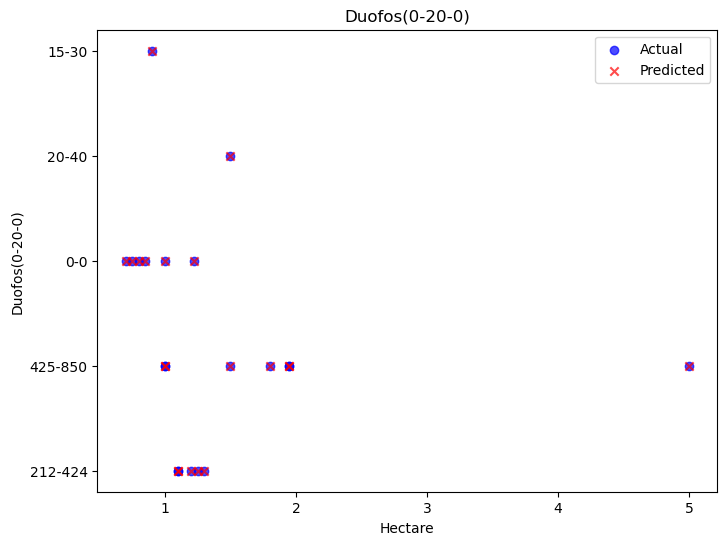

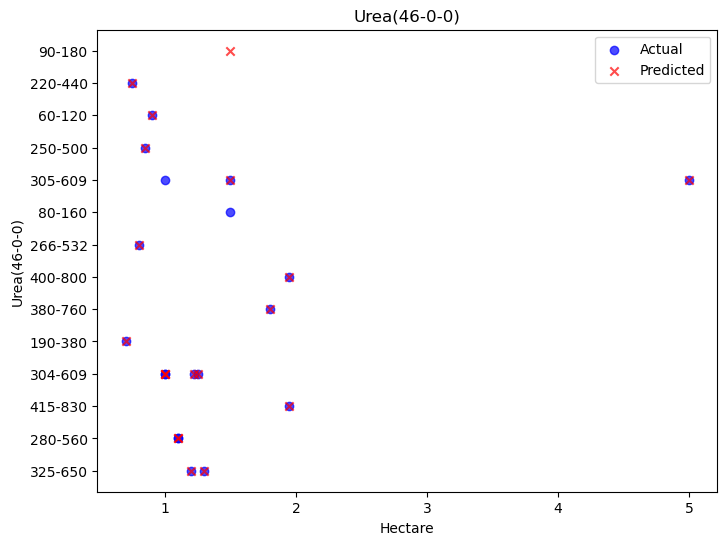

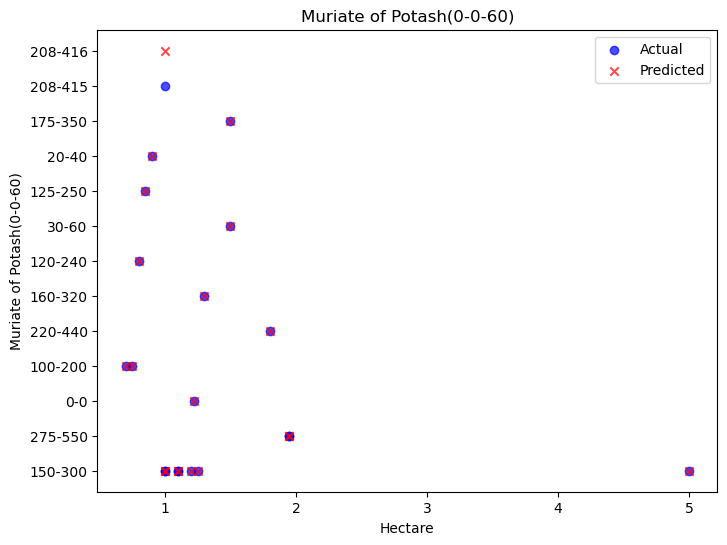

In [35]:

# Combine the original test data with the predicted values
predicted_fertilizer = pd.DataFrame({
    'Duofos(0-20-0)': y_duofos_pred,
    'Urea(46-0-0)': y_urea_pred,
    'Muriate of Potash(0-0-60)': y_muriate_pred
}, index=X_test.index)

# Concatenate the original test data with the predicted values
combined_data = pd.concat([X_test, predicted_fertilizer], axis=1)

# Create scatter plots for each nutrient


# Duofos(0-20-0) nutrient
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Hectare'], y_duofos_test, label='Actual', alpha=0.7,color='blue')
plt.scatter(X_test['Hectare'], y_duofos_pred, label='Predicted', marker='x', alpha=0.7,color='red')
plt.title('Duofos(0-20-0)')
plt.xlabel('Hectare')
plt.ylabel('Duofos(0-20-0)')
plt.legend()
plt.show()
# Urea(46-0-0) nutrient
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Hectare'], y_urea_test, label='Actual', alpha=0.7,color='blue',)
plt.scatter(X_test['Hectare'], y_urea_pred, label='Predicted',marker='x', alpha=0.7,color='red')
plt.title('Urea(46-0-0)')
plt.xlabel('Hectare')
plt.ylabel('Urea(46-0-0)')
plt.legend()
plt.show()
# Muriate of Potash(0-0-60) nutrient
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Hectare'], y_muriate_test, label='Actual', alpha=0.7,color='blue')
plt.scatter(X_test['Hectare'], y_muriate_pred, label='Predicted',marker='x', alpha=0.7,color='red')
plt.title('Muriate of Potash(0-0-60)')
plt.xlabel('Hectare')
plt.ylabel('Muriate of Potash(0-0-60)')
plt.legend()
plt.show()

EXPORTING

In [8]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Assuming classifier_duofos is your trained scikit-learn model
initial_type = [('input', FloatTensorType([None, 5]))]  # You need to specify the input data type

# Convert the scikit-learn model to ONNX format
onnx_model = convert_sklearn(classifier_duofos, initial_types=initial_type)

# Save the ONNX model to a file
onnx.save_model(onnx_model, "duofosModelV1.onnx")



#USAGE

In [35]:
# import onnxruntime
# import numpy as np

# # Load the ONNX model
# onnx_session = onnxruntime.InferenceSession("duofosModelV1.onnx")

# # Prepare the input data (replace with your actual input data)
# input_data = np.array([[1.0, 0.75, 1.08,0.88, 320.37]], dtype=np.float32)

# # Run inference
# input_name = onnx_session.get_inputs()[0].name
# output_name = onnx_session.get_outputs()[0].name
# result = onnx_session.run([output_name], {input_name: input_data})

# # Extract and print the prediction
# prediction = result[0]
# print("Prediction:", prediction)

NoSuchFile: [ONNXRuntimeError] : 3 : NO_SUCHFILE : Load model from duofosModelV1.onnx failed:Load model duofosModelV1.onnx failed. File doesn't exist

In [45]:
import joblib

# Save the Duofos model
joblib.dump(classifier_duofos, 'duofos_model.joblib')




['duofos_model.joblib']

In [46]:
import numpy as np
import joblib

# Load the model from the .joblib file
loaded_model = joblib.load('duofos_model.joblib')

# Prepare the input data for prediction
input_data = np.array([[1.0, 0.75, 1.08, 0.88, 320.37]], dtype=np.float32)

# Make predictions using the loaded model
predictions = loaded_model.predict(input_data)

# Print the predictions
print(predictions)


['10-20']


C:\Users\Dex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [42]:
!pip install scikit-learn==1.2.2



     ---------------------------------------- 8.4/8.4 MB 653.4 kB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.1
    Uninstalling scikit-learn-1.3.1:
      Successfully uninstalled scikit-learn-1.3.1


In [43]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\dex\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: scikit-learn-intelex, skl2onnx
Note: you may need to restart the kernel to use updated packages.


In [5]:
import joblib

# Create a list of the three models
models = [classifier_duofos, classifier_urea, classifier_muriate]

# Save the list of models to a joblib file
joblib.dump(models, 'models.joblib')


['models.joblib']

In [11]:
# Get the three models from the list or tuple
classifier_duofos = models[0]
classifier_urea = models[1]
classifier_muriate = models[2]

input_data = np.array([[1.0, 0.75, 1.08, 0.88, 320.37]], dtype=np.float32)
duofos_prediction = classifier_duofos.predict(input_data)
urea_prediction = classifier_urea.predict(input_data)
muriate_prediction = classifier_muriate.predict(input_data)

C:\Users\Dex\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dex\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dex\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
print(duofos_prediction,urea_prediction, muriate_prediction)

['10-20'] ['50-100'] ['15-30']
